In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:

cols=df.columns

In [5]:
cols

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
x=df.iloc[: , 0:7]
y=df['label']

In [7]:
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(x_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.990909090909091


In [10]:

op=clf.predict_proba([[90,42,43,20.879744,82.002744,6.502985,202.935536]])

In [11]:
ans=pd.DataFrame(clf.predict_proba([[90,42,43,20.879744,82.002744,6.502985,202.935536]]), columns=clf.classes_)

In [12]:
ans

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98,0.0


In [13]:
len(y.unique())

22

In [14]:
# using the feature importance variable
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=x.columns ).sort_values(ascending = False)
feature_imp



humidity       0.227772
rainfall       0.217019
K              0.181243
P              0.137700
N              0.106078
temperature    0.073249
ph             0.056938
dtype: float64

In [15]:
_=clf.predict([[99,15,27,27.417112,56.636362,6.086922,127.924610]])

In [16]:
_[0]

'coffee'

In [17]:
import pickle

# Assuming 'model' is your trained machine learning model object
with open('recommendation_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [18]:
checks= []
for col in x:
#     print(col)
    mn,mx=x[col].min(), x[col].max()
    checks.append( [col,mn,mx] )
checks

[['N', 0, 140],
 ['P', 5, 145],
 ['K', 5, 205],
 ['temperature', 8.825674745, 43.67549305],
 ['humidity', 14.25803981, 99.98187601],
 ['ph', 3.504752314, 9.93509073],
 ['rainfall', 20.21126747, 298.5601175]]

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve,precision_score,recall_score

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        32
      grapes       1.00      1.00      1.00        24
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        27
      lentil       1.00      1.00      1.00        26
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [24]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9922727272727272
Recall: 0.990909090909091


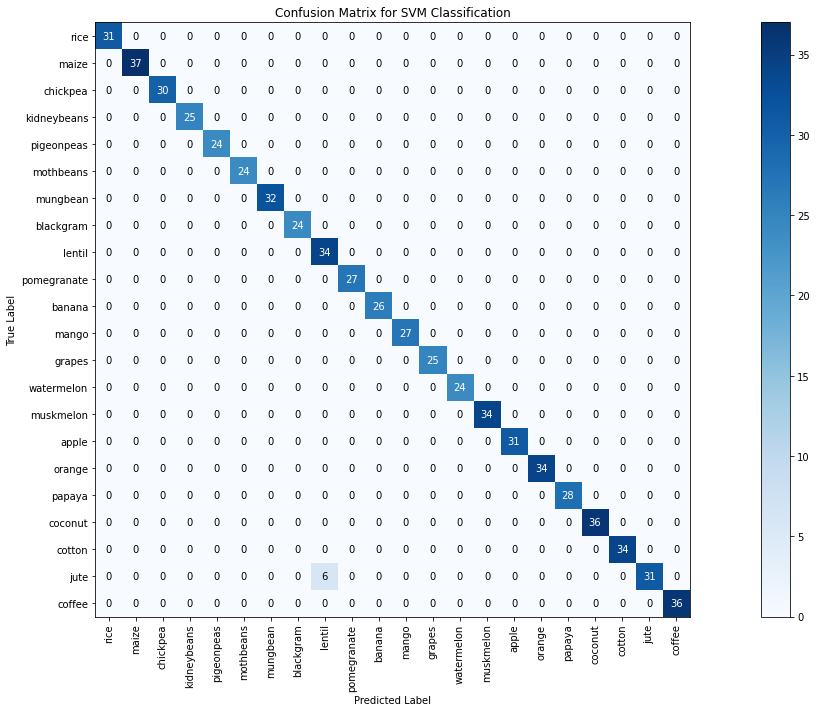

In [26]:
plt.figure(figsize=(20, 10))


# Plot confusion matrix with labeled values
im = plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVM Classification')
plt.colorbar(im)

# Add labels to the plot
classes = df.label.unique()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

# Add numerical values to the plot
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].